<a href="https://colab.research.google.com/github/Yurovskyy/CDD/blob/main/TrabalhoGovernanca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Participantes

## Yuri Fonseca Lopes - 214450006

## Thais Calixto

# 1. Formalização do problema

## 1.1. Contextualização

Existem várias maneiras de avaliar o desempenho de uma empresa para decidir se é válido comprar ações da mesma. Alguns métodos existentes são:

CAPM (Modelo de precificação de ativos de capital). É um método que analise a relação entre o risco e o retorno que é esperado de um investimento, obtido a partir de princípios de diversificação com pressupostos simplificados. Inicialmente é irrealista (principalmente no Brasil).

HME (Hipótese do mercado eficiente). Essa hipótese afirma que os mercados são eficientes, ou seja, um agente não consegue alcançar consistentemente retornos superioers à média do mercado, pois os preços dos ativos refletem toda a informação disponível em um dado momento de tempo. É importante citar que o mercado não é 100% racional.

Análise técnica. É uma busca por padrões recorrentes e previsíveis nos preços do ativo. Esse método é negado pelo HME.

Análise Fundamentalista. Utiliza indicadores financeiros, de gestão, do negócio e do risco da empresa, além de índices macroeconômicos na busca de determinar o valor presente descontado dos fluxos de caixa da empresa para chegar ao valor justo de cada ação. Esse método é quase todo negado pelo HME.

## 1.2. Motivação

Podemos usar outro método de avaliação de empresas chamado Indice de Governança para definir conjuntos de empresas com boas governanças. Empresas com boa governança tendem a lucrar.

## 1.3. Importância

Esse novo modelo é importante, pois agrupa as empresas em conjuntos(clusters) que tendem a ser semelhantes. Isso significa que quando uma empresa foi bem avaliada usando os métodos citados em Contextualização (1.1), as outras empresas provavelmente também vão ser bem avaliadas usando esses métodos.
Ou seja, esse modelo nos ajudará a decidir se devemos ou não comprar as ações desse grupo de empresas.

## 1.4. Abordagem analítica

Vamos usar um algoritmo de MachineLearning para clusterizar as empresas.

# 2. Hipótese a ser investigada

## 2.1. Objetivo geral

Temos como objetivo obter conjuntos(clusters) que indicam empresas de boa governança.

## 2.2. Etapas para atingir o objetivo

Devemos
1. Definir o problema
2. Obter os dados
3. Explorar os dados
4. Preparar os dados
5. Construir o modelo
6. Avaliar o modelo

## 2.3. Metodologia experimental

# 3. Revisão bibliográfica

## 3.1 Duas referências de artigos científicos

- https://revistas.pucsp.br/rad/article/view/685
- https://periodicos.fgv.br/rbfin/article/view/1143


## 3.2 Dois projetos semelhantes

- https://paperswithcode.com/method/k-means-clustering (achar outro)
- https://github.com/andymcdgeo/Andys_YouTube_Notebooks

## 3.3 Como esses quatro estão inseridos no contexto do seu trabalho

Os dois artigos comparam o indice de governança com a lucratividade da empresa. Os dois projetos ensinam a utilizar o algoritmo de clusterização usando o k-means.


# 4. Base de dados utilizada

## 4.1. Porquê essa base de dados é adequada?

Essa base de dados é adequada pois ela nos diz as respostas das empresas em relação as 5 categorias de governança.

## 4.2. Apresentar a base de dados

Serão extraídos de https://github.com/Yurovskyy/sitedeploy/raw/gh-pages/docs/dataset_CGVN.xlsx?download=. Vou converter os mesmos para CSV e coloca-lo no github do trabalho atual.

Como se trata de um algoritmo de clusterização, não precisamos de um dataset de teste.

## 4.3. Detalhe a base de dados

Como o arquivo origina pesava 100mb, não foi possível formatar o mesmo por meio desse notebook, pois isso exigiria que eu fizesse upload do arquivo no github, mas o github barra arquivos de serem enviados acima de 50mb.

Por causa disso, criei um script local que retira as colunas do csv que eu não preciso para esse algoritmo e fiz upload do csv formatado no github.

> O script de limpeza usado se encontra no final do notebook. O script não é para ser executado.

O dataset formatado está no seguinte link: https://github.com/Yurovskyy/CDD/blob/main/dataset_CGVN.csv

No total, o dataset tem 115.722 entradas. Cada empresa em cada ano contém 54 Itens (entradas), logo o total de Itens que serão usados (Total das Prticas_adotadas) é 2.143 😀

No dataset temos as seguintes colunas
1. Data_Referencia
2. Versao
3. Nome_Empresarial
4. ID_Item
5. Pratica_Adotada

### 1. Data_Referencia

O item 1 refere-se a data em que as respostas foram colhidas. Algumas empresas mandam suas respostas desde 2018 (que é a data de inicio do dataset), outras começaram em 2019 por exemplo.

Vamos avaliar a governança empresarial de cada ano caso a empresa tenha uma entrada por ano. Dessa maneira, podemos também avaliar se a governança da empresa melhorou ou piorou com o passar do tempo.

> Tecnicamente falando, vamos contatenar a data ao Nome_Empresarial para diferenciar a empresa no tempo

### 2. Versao

O item 2 refere-se a versão das respostas. A empresa pode ter mandado uma resposta incompleta e ter submetido outra durante a data de entrega anual. Essa coluna não é relevante, pois sempre vamos considerar o resultado final.

### 3. Nome_Empresarial

O item 3 é um item para identificação da empresa -nome da empresa - (juntamente com a Data_Referencia)

### 4. ID_Item

O item 4 refere-se ao item de governança. Cada item tem um texto o descrevendo, que pode ser encontrado no seguinte link

https://yurovskyy.github.io/sitedeploy/

(Clique em dados e depois em governança). A tabela no final da página contém o ID_item e sua descrição (Princípio e prática recomendada).

### 5. Pratica_Adotada

o item 5 é o mais importante do dataset, pois nele temos a informação que queremos. Temos 4 **variáveis categóricas** condizentes as respostas das empresas de acordo com os ID_itens (item 4). Vamos realizar a seguinte transformação

- Sim → +1
- Não → -1
- Não se aplica → +0
- Parcialmente → +0,5

Se a resposta da empresa é sim, ela cumpre com a prática recomendada (ID_Item), se é não, ela não cumpre.
O Não se aplica se deve a empresas que essa prática não faz sentido.
O parcialmente é um meio termo entre o sim e o não

> Em iterações futuras do trabalho, acredito que devo trabalhar essa transformação de categóricas de uma forma mais aprofundada, pois o professor Marcos me disse que essa parte é bem importante. Rumo aos dados perfeitos!
> ### Perfect Data → Perfect Model → Perfect Results

Como os dados já estão sendo trabalhados a algum tempo (artigo), não existem valores faltantes 😀


# 5. Utilize uma biblioteca de autoML para ter o resultado inicial

## 5.1. Porquê essa biblioteca?

## 5.2. Qual é a métrica de avaliação utilizada?

## 5.3. Apresente os resultados

# 6. Discussão e Considerações finais

## 6.1. Os resultados são bons?

## 6.2. Existe algum ganho em usar indicadores estatíticos para os dados?

## 6.3. A proposta é adequada para ser utilizada ao longo do curso?

# 4. Preparação dos dados

Devemos formatar os dados para que os mesmos se adequem ao framework que vamos usar. Nesse caso vamos usar o H20, especificadamente o autoH20 com o **H20KMeansEstimator**

https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2okmeansestimator

Esse link é a documentação sobre o framework (módulo) H20.

#5. 6. Construção do modelo e avaliação

Usaremos um autoML

In [56]:
# @title Importando os pacotes necessários
!pip install h2o
import pandas as pd
import requests
import h2o
from h2o.estimators import H2OKMeansEstimator
from matplotlib import pyplot as plt


In [43]:
# @title Inicializando o cluster do h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 39 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,"28 days, 23 hours and 1 minute"
H2O_cluster_name:,H2O_from_python_unknownUser_m0o544
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [44]:
# @title Carregando o dataset

# URL do arquivo CSV
url = 'https://github.com/Yurovskyy/CDD/raw/main/dataset_CGVN.csv'

# Baixar o arquivo CSV da web
response = requests.get(url)

# Verificar se a solicitação foi bem-sucedida
if response.status_code == 200:
    # Ler o conteúdo do arquivo CSV usando o Pandas
    df = pd.read_csv(url)
    # Faça o que precisar com o dataframe df
    dimensoes = df.shape
    print("Número de entradas(linhas):", dimensoes[0])
    print("Número de colunas(variáveis):", dimensoes[1])

# Se a solicitação não for bem-sucedida
else:
    print('Falha ao baixar o arquivo CSV.')

# Obter as dimensões do DataFrame


Número de entradas(linhas): 115722
Número de colunas(variáveis): 5


In [45]:
# @title Exploração inicial do dataset

# identificar o tipo de cada variável
display(df.dtypes)

# ver as 5 primeiras entradas do conjunto de treino
display(df.head())

Data_Referencia     object
Versao               int64
Nome_Empresarial    object
ID_Item             object
Pratica_Adotada     object
dtype: object

,Data_Referencia,Versao,Nome_Empresarial,ID_Item,Pratica_Adotada
0,2018-12-31,1,BCO BRASIL S.A.,1.1.1,Sim
1,2018-12-31,1,BCO BRASIL S.A.,1.2.1,Sim
2,2018-12-31,1,BCO BRASIL S.A.,1.3.1,Sim
3,2018-12-31,1,BCO BRASIL S.A.,1.3.2,Sim
4,2018-12-31,1,BCO BRASIL S.A.,1.4.1,Não


In [46]:
# @title Valores faltantes

# ver a porcentagem valores faltantes
display((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))

# Como eu disse, não existem valores faltantes!

Data_Referencia     0.0
Versao              0.0
Nome_Empresarial    0.0
ID_Item             0.0
Pratica_Adotada     0.0
dtype: float64

In [47]:
# @title Descrição dos valores categóricos

display(df.describe(include=['O']))

# Temos 499 empresas únicas! (contando com as que se repetem em diferentes intervalos de tempo)

,Data_Referencia,Nome_Empresarial,ID_Item,Pratica_Adotada
count,115722,115722,115722,115722
unique,34,499,54,4
top,2022-12-31,METALURGICA GERDAU S.A.,1.1.1,Sim
freq,23004,378,2143,60208


In [48]:
# @title Transformação das variáveis categórias em numéricas

# Criar um dicionário de mapeamento
mapeamento = {
    'Sim': 1,
    'Não': -1,
    'Não se Aplica': 0,
    'Parcialmente': 0.5
}

# Usar o método map() para aplicar o mapeamento à coluna
df['Pratica_Adotada_Num'] = df['Pratica_Adotada'].map(mapeamento)

# Exibir o DataFrame com a nova coluna
display(df)

,Data_Referencia,Versao,Nome_Empresarial,ID_Item,Pratica_Adotada,Pratica_Adotada_Num
0,2018-12-31,1,BCO BRASIL S.A.,1.1.1,Sim,1.0
1,2018-12-31,1,BCO BRASIL S.A.,1.2.1,Sim,1.0
2,2018-12-31,1,BCO BRASIL S.A.,1.3.1,Sim,1.0
3,2018-12-31,1,BCO BRASIL S.A.,1.3.2,Sim,1.0
4,2018-12-31,1,BCO BRASIL S.A.,1.4.1,Não,-1.0
...,...,...,...,...,...,...
115717,2024-12-31,1,METALURGICA GERDAU S.A.,5.3.2,Sim,1.0
115718,2024-12-31,1,METALURGICA GERDAU S.A.,5.4.1,Sim,1.0
115719,2024-12-31,1,METALURGICA GERDAU S.A.,5.5.1,Sim,1.0
115720,2024-12-31,1,METALURGICA GERDAU S.A.,5.5.2,Sim,1.0


In [49]:
# @title Agrupamento

# Em seguida, agrupe os dados pelo nome da empresa e some os valores mapeados
soma_por_empresa = df.groupby(['Nome_Empresarial', 'Data_Referencia'])['Pratica_Adotada_Num'].sum().reset_index()

# Exibir o DataFrame com as somas por empresa
display(soma_por_empresa.describe())
display(soma_por_empresa)

# Temos 2.143 empresas ! (Sem contar com as que se repetem no tempo) (Como se uma empresa que tivesse outra resposta em outr ano fosse outra empresa)

,Pratica_Adotada_Num
count,2143.000000
mean,21.218852
std,19.345601
min,-40.000000
25%,11.500000
50%,26.000000
75%,35.750000
max,51.500000


,Nome_Empresarial,Data_Referencia,Pratica_Adotada_Num
0,2W ECOBANK S.A.,2022-12-31,37.5
1,2W ECOBANK S.A.,2023-12-31,44.0
2,3R PETROLEUM ÓLEO E GÁS S.A.,2021-12-31,31.0
3,3R PETROLEUM ÓLEO E GÁS S.A.,2022-12-31,38.5
4,3R PETROLEUM ÓLEO E GÁS S.A.,2023-12-31,39.0
...,...,...,...
2138,ZAMP SA,2019-12-31,15.5
2139,ZAMP SA,2020-12-31,27.0
2140,ZAMP SA,2021-12-31,30.5
2141,ZAMP SA,2022-12-31,35.0


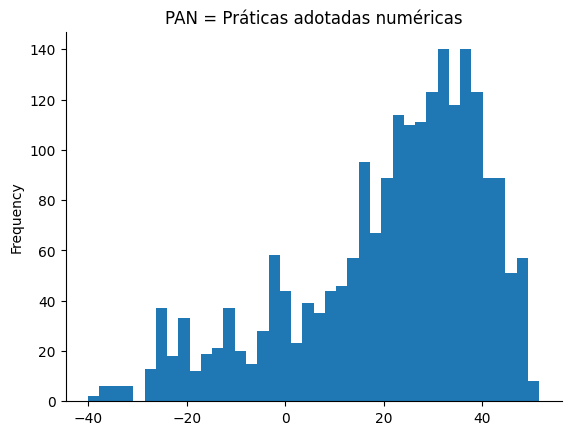

In [50]:
# @title Gráfico de práticas adotadas (PAN) por frequência

soma_por_empresa['Pratica_Adotada_Num'].plot(kind='hist', bins=40, title='PAN = Práticas adotadas numéricas')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [53]:
# @title Ajustes finais

# Converta o DataFrame para h2o
data_h2o = h2o.H2OFrame(soma_por_empresa)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [60]:
# @title Finalmente

# Inicialize o estimador K-means
kmeans = H2OKMeansEstimator(seed=1)  # Defina o número de clusters desejados e a semente aleatória, se necessário

# Treine o modelo K-means
kmeans.train(x=['Data_Referencia', 'Pratica_Adotada_Num'], training_frame=data_h2o)


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OKMeansEstimator : K-means
Model Key: KMeans_model_python_1712839436303_4


Model Summary: 
    number_of_rows    number_of_clusters    number_of_categorical_columns    number_of_iterations    within_cluster_sum_of_squares    total_sum_of_squares    between_cluster_sum_of_squares
--  ----------------  --------------------  -------------------------------  ----------------------  -------------------------------  ----------------------  --------------------------------
    2143              1                     0                                2                       4284                             4284                    0

ModelMetricsClustering: kmeans
** Reported on train data. **

Total Within Cluster Sum of Square Error: 4284.00002461452
Total Sum of Square Error to Grand Mean: 4284.00002461452
Between Cluster Sum of Square Error: 0.0

Centroid Statistics: 
    centroid    size    within_cluster_sum_of_squares
--  ----------  ------  -------------------------------
    1           2143    4284

Scoring History: 
    timestamp            duration    iterations    number_of_reassigned_observations    within_cluster_sum_of_squares
--  -------------------  ----------  ------------  -----------------------------------  -------------------------------
    2024-04-11 14:43:08  0.086 sec   0             nan                                  nan
    2024-04-11 14:43:08  0.117 sec   1             2143                                 13570.4
    2024-04-11 14:43:08  0.119 sec   2             0                                    4284

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 32.

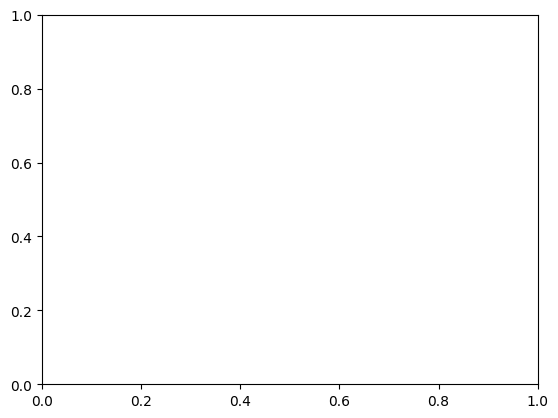

In [68]:
# Faça as previsões usando o modelo k-means
predictions = kmeans.predict(data_h2o)

# Adicione a coluna 'predict' ao DataFrame data_h2o
data_h2o['Cluster'] = predictions['predict']

# Plot os clusters
plt.scatter(data_h2o['Data_Referencia'], data_h2o['Pratica_Adotada_Num'], c=data_h2o['Cluster'], cmap='viridis')
plt.xlabel('Data_Referencia')
plt.ylabel('Praticas_adotadas_num')
plt.title('K-means Clustering')
plt.show()

# ANEXO (NÃO EXECUTE)

In [38]:
# import pandas as pd

# Carregar o arquivo CSV
df = pd.read_csv('C:\\Users\\Yuri\\Desktop\\artigo\\backend\\novoscript\\results\\dataset_CGVN.csv',sep=";")

# Selecionar as colunas necessárias
colunas_desejadas = ['Data_Referencia', 'Versao', 'Nome_Empresarial', 'ID_Item', 'Pratica_Adotada']
df = df[colunas_desejadas]

# Salvar o arquivo CSV modificado
df.to_csv('dataset_CGVN.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Yuri\\Desktop\\artigo\\backend\\novoscript\\results\\dataset_CGVN.csv'